Feature matrix shape: (20, 36000)
Processing directory: C:/Users/abhig/OneDrive/Desktop/Lab DSA/faces94/female/ksunth


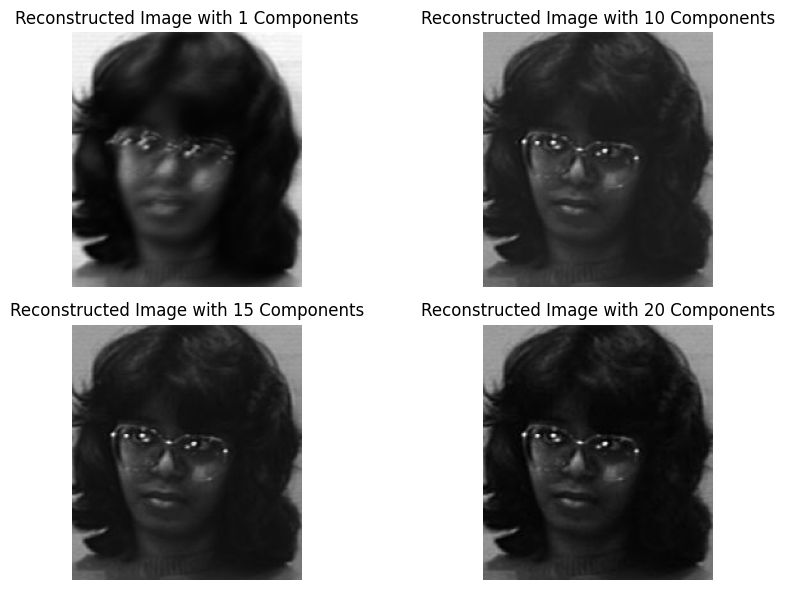

Processing directory: C:/Users/abhig/OneDrive/Desktop/Lab DSA/faces94/male/admars


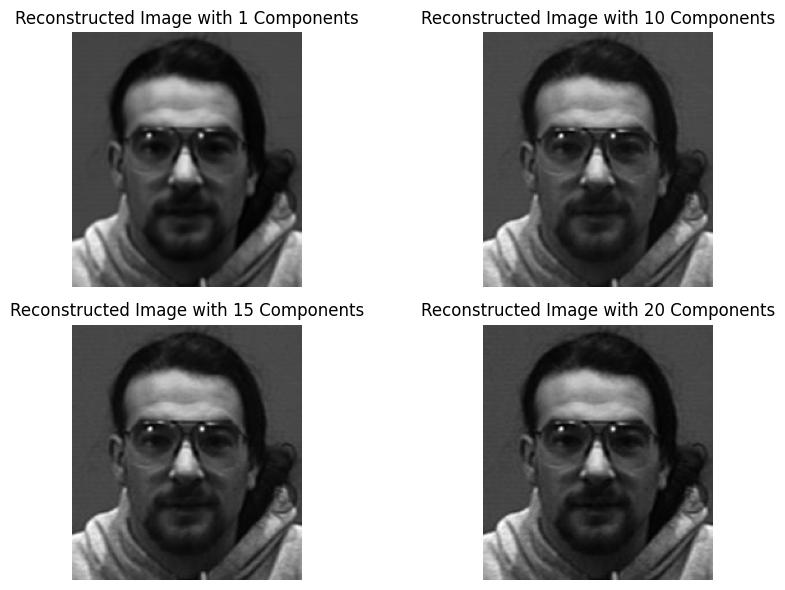

Processing directory: C:/Users/abhig/OneDrive/Desktop/Lab DSA/faces94/malestaff/obeidn


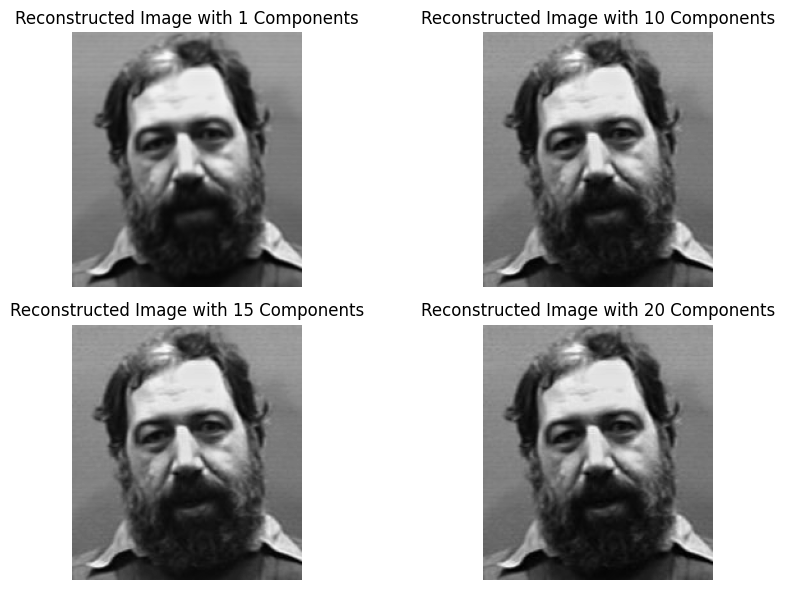

In [6]:
import zipfile
import os
import numpy as np
from PIL import Image
import cv2
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA

# Path to the uploaded zip file
zip_file_path = 'C:/Users/abhig/OneDrive/Desktop/Lab DSA/faces94.zip'  # Change this path if different

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('C:/Users/abhig/OneDrive/Desktop/Lab DSA/faces94')

# Directory containing the images you want to process
image_dir = 'C:/Users/abhig/OneDrive/Desktop/Lab DSA/faces94/female/sbains'  # Path to the target folder

# List all image files in the directory
image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg')]  # Adjust extension if needed

# Initialize a list to store flattened images
flattened_images = []

# Loop through each image file
for image_file in image_files:
    # Load image
    image_path = os.path.join(image_dir, image_file)
    img = Image.open(image_path)

    # Convert to grayscale if not already
    img = img.convert('L')  # 'L' mode is for grayscale images

    # Flatten the image and convert to a numpy array
    img_array = np.array(img).flatten()

    img_array_normalized = img_array / 255.0

    # Append the flattened image to the list
    flattened_images.append(img_array_normalized)

# Convert the list of flattened images into a NumPy array
features_matrix = np.array(flattened_images)



# Display the shape of the resulting feature matrix
print(f"Feature matrix shape: {features_matrix.shape}")
def load_and_flatten_images(image_dir):
    image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg')]
    images = []
    for img_file in image_files:
        img_path = os.path.join(image_dir, img_file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
        img_resized = cv2.resize(img, (180, 200))  # Resize to 200x180
        images.append(img_resized.flatten())  # Flatten the image
    return np.array(images)

dirs = [
    'C:/Users/abhig/OneDrive/Desktop/Lab DSA/faces94/female/ksunth',
    'C:/Users/abhig/OneDrive/Desktop/Lab DSA/faces94/male/admars',
    'C:/Users/abhig/OneDrive/Desktop/Lab DSA/faces94/malestaff/obeidn'
]

for dir_path in dirs:
    print(f"Processing directory: {dir_path}")

    # Load and flatten images from the directory
    features_matrix = load_and_flatten_images(dir_path)

    # Define the number of components to test
    components_list = [1, 10, 15, 20]

    # Create a figure to display the reconstructed images
    plt.figure(figsize=(10, 6))

    # Loop through the different numbers of components
    for i, n_components in enumerate(components_list, 1):
        # Apply PCA with the specified number of components
        pca = PCA(n_components=n_components)
        Z = pca.fit_transform(features_matrix)  # Reduce to n_components
        reconstructed_images = pca.inverse_transform(Z)  # Reconstruct the images

        # Reshape the first image back to its original shape (200x180)
        reconstructed_image = reconstructed_images[5].reshape(200, 180)

        # Plot the reconstructed image
        plt.subplot(2, 2, i)
        plt.imshow(reconstructed_image, cmap='gray')
        plt.title(f'Reconstructed Image with {n_components} Components')
        plt.axis('off')


    # Show the plot for the current directory
    plt.tight_layout()
    plt.show()
